In [191]:
#The usual collection of indispensables 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.fftpack

# And the tf and keras framework, thanks to Google
import tensorflow as tf
from tensorflow import keras

In [256]:
#---------------------------------- TEST METHOD 1
def way_1_random_row():
    position = random.randrange(2)
    tm = np.zeros(40)
    if(position==0):
        for i in range(0,20):
            tm[i] = random.uniform(10, 20.0)
    if(position==1):
        for i in range(0,20):
            tm[i+20] = random.uniform(10, 20.0)
    return(tm,position)

train_data = [np.zeros(40)]
train_labels = []
for k in range(5000):
    data_row,data_row_category = way_1_random_row()
    data_row = data_row[0:40]
    data_row = data_row / data_row.max()
    train_labels.append(data_row_category)
    train_data = np.concatenate((train_data,[data_row]), axis=0);

#---------------------------------- TRAIN DATA
train_data = train_data[1:]
train_labels = np.array(train_labels)
class_names = ['With_Opening', 'Without_Opening']
train_data = train_data / train_data.max()

#---------------------------------- TEST DATA
test_data = [np.zeros(40)]
test_labels = []
for k in range(500):
    data_row,data_row_category = way_1_random_row()
    data_row = data_row[0:40]
    test_labels.append(data_row_category)
    test_data = np.concatenate((test_data,[data_row]), axis=0);

test_data = test_data[1:]
test_labels = np.array(test_labels)
test_data = test_data / test_data.max()

In [302]:
model = keras.Sequential([
    keras.layers.Dense(40),  # input layer (1)
     keras.layers.Dense(8),  # hidden layer (2)
    keras.layers.Dense(1) # output layer (3)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=5)

Epoch 1/5
157/157 [==============================] - 1s 796us/step - loss: 7.7799 - accuracy: 0.4956
Epoch 2/5
157/157 [==============================] - 0s 823us/step - loss: 8.0245 - accuracy: 0.4798
Epoch 3/5
157/157 [==============================] - 0s 957us/step - loss: 7.8318 - accuracy: 0.4923
Epoch 4/5
157/157 [==============================] - 0s 724us/step - loss: 7.7663 - accuracy: 0.4965
Epoch 5/5
157/157 [==============================] - 0s 1ms/step - loss: 7.9377 - accuracy: 0.4854


In [301]:
model.summary()



ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

Epoch 1/5
157/157 [==============================] - 1s 804us/step - loss: 3.5458e-04 - accuracy: 1.0000
Epoch 2/5
157/157 [==============================] - 0s 675us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
157/157 [==============================] - 0s 750us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
157/157 [==============================] - 0s 698us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
157/157 [==============================] - 0s 680us/step - loss: 0.0000e+00 - accuracy: 1.0000


In [279]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

16/16 [==============================] - 0s 713us/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0


In [192]:
def one_random_row():
    orientation = random.randrange(2)
    if(orientation==0):
        start_line = 0
        end_line = 10
        timestep_line = 0.1
    if(orientation==1):
        start_line = 5
        end_line = 1
        timestep_line = -0.1
    tm =  np.arange(start_line,end_line , timestep_line);
    SNR = random.uniform(1, 20.0)
    LC = random.uniform(1, 50.0)
    tm_2 = tm + LC + np.random.normal(0,10**(-SNR/20),len(tm))
    return(tm_2,orientation)

In [233]:
#------------------------------- TRAIN DATA
train_data = [np.zeros(40)]
train_labels = []
for k in range(10000):
    data_row,data_row_category = one_random_row()
    data_row = data_row[0:40]
    data_row = data_row / data_row.max()
    train_labels.append(data_row_category)
    train_data = np.concatenate((train_data,[data_row]), axis=0);

train_data = train_data[1:]
train_labels = np.array(train_labels)
class_names = ['With_Opening', 'Without_Opening']
train_data = train_data / train_data.max()

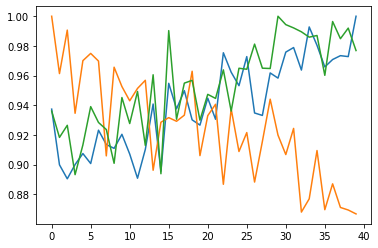

In [234]:
plt.plot(train_data[0])
plt.plot(train_data[1])
plt.plot(train_data[2])
plt.show()

In [194]:
#------------------------------- TEST DATA
test_data = [np.zeros(40)]
test_labels = []
for k in range(500):
    data_row,data_row_category = one_random_row()
    data_row = data_row[0:40]
    test_labels.append(data_row_category)
    test_data = np.concatenate((test_data,[data_row]), axis=0);

test_data = test_data[1:]
test_labels = np.array(test_labels)
test_data = test_data / test_data.max()

In [228]:
model = keras.Sequential([
    keras.layers.Dense(30),  # input layer (1)
     keras.layers.Dense(20, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(1, activation='softmax') # output layer (3)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=1)

313/313 [==============================] - 1s 751us/step - loss: 0.0224 - accuracy: 0.4943


In [198]:


test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

16/16 [==============================] - 0s 770us/step - loss: 0.1372 - accuracy: 0.5340
Test accuracy: 0.5339999794960022


In [ ]:
# Time series prediction model
def dnn_keras_tspred_model():
    model = keras.Sequential([
        keras.layers.Dense(40, activation=tf.nn.relu),
        keras.layers.Dense(20, activation=tf.nn.relu),
        keras.layers.Dense(1)])
    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae']) 
    model.summary()
    return model

model = dnn_keras_tspred_model()